In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pollution = pd.read_csv('./../../data/visualization/pollution_wide.csv')
average_ests = pd.read_csv('./../../data/visualization/average_ests.csv')

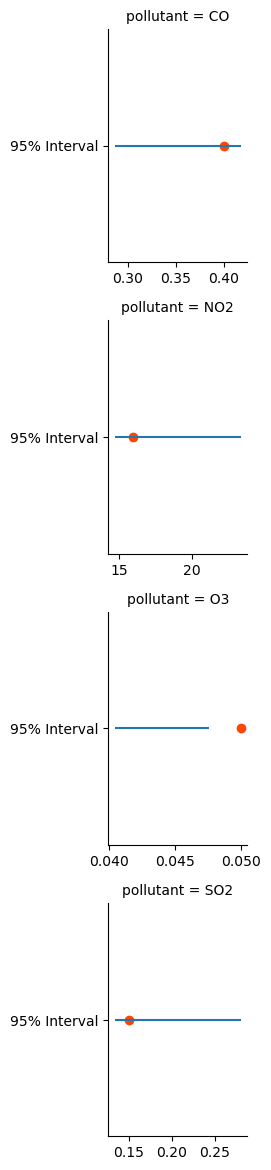

In [4]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('') 

plt.show()

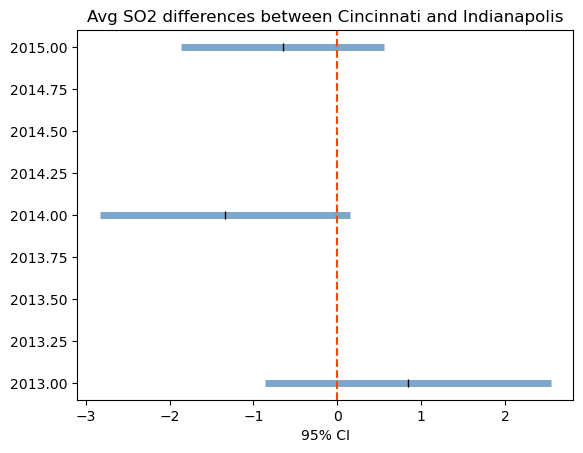

In [5]:
diffs_by_year = pd.read_csv('./data/diffs_by_year.csv')

# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

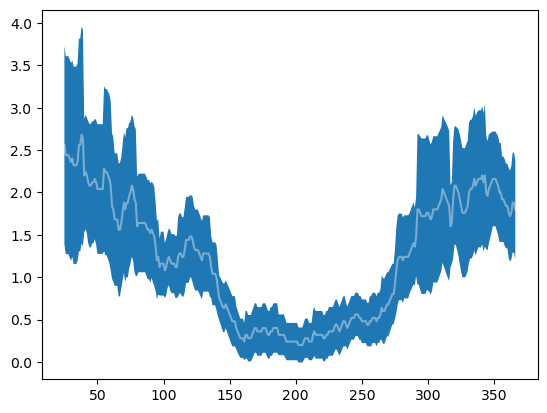

In [7]:
vandenberg_NO2 = pd.read_csv('./data/vandenberg_NO2.csv')

# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()

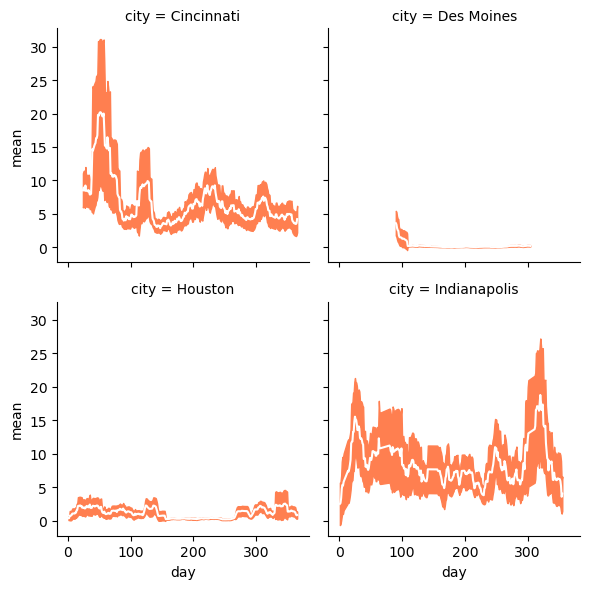

In [8]:
eastern_SO2 = pd.read_csv('./data/eastern_SO2.csv')

# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')

plt.show()

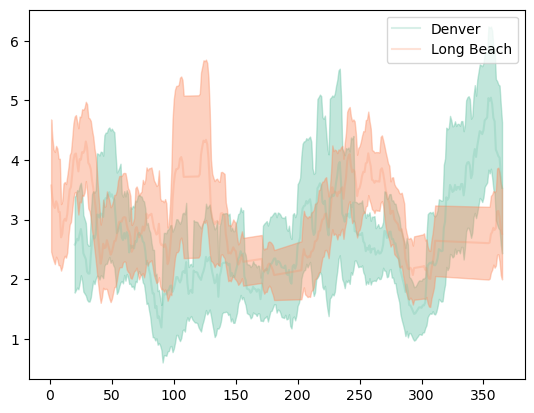

In [9]:
SO2_compare = pd.read_csv('./data/SO2_compare.csv')

for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
                     color = color, alpha = 0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data = city_data, label = city,
             color = color, alpha = 0.25)

plt.legend()
plt.show()

In [10]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

## Can't run this one since they didn't share the freaking linear regression.
#for alpha, color, width in zip(alphas, colors, widths):
#    # Grab confidence interval
#    conf_ints = pollution_model.conf_int(alpha)
#    
#    # Pass current interval color and legend label to plot
#    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
#               colors = color, label = width, linewidth = 10) 

# Draw point estimates
#plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

#plt.legend()
#plt.show() 

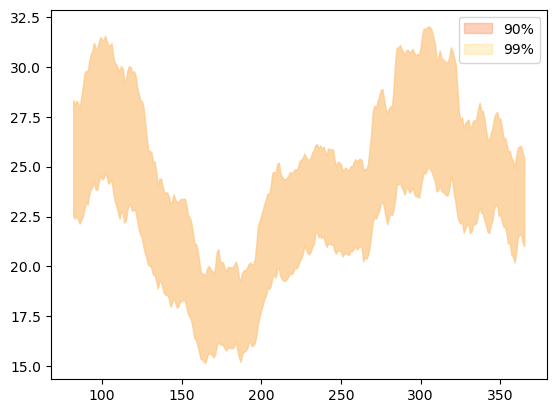

In [11]:
cinci_13_no2 = pd.read_csv('./data/cinci_13_no2.csv')

int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['mean'] - 2*cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + 2*cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()

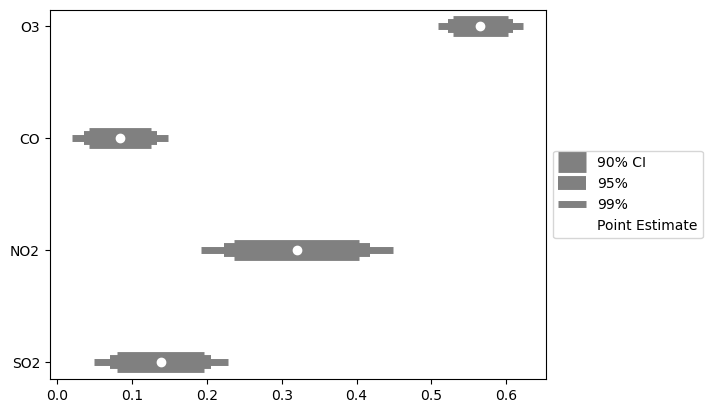

In [16]:
rocket_model = np.array([["","pollutant","est","std_err"],
                [0,"SO2",0.13818519,0.03465057],
                [1,"NO2",0.32012064,0.04984866],
                [2,"CO",0.0842821,0.0247576],
                [3,"O3",0.56536813,0.02219086]])
rocket_model = pd.DataFrame(data=rocket_model[1:,1:], 
              index=rocket_model[1:,0],    
              columns=rocket_model[0,1:])

rocket_model["est"] = rocket_model["est"].astype('float')
rocket_model["std_err"] = rocket_model["std_err"].astype('float')

# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

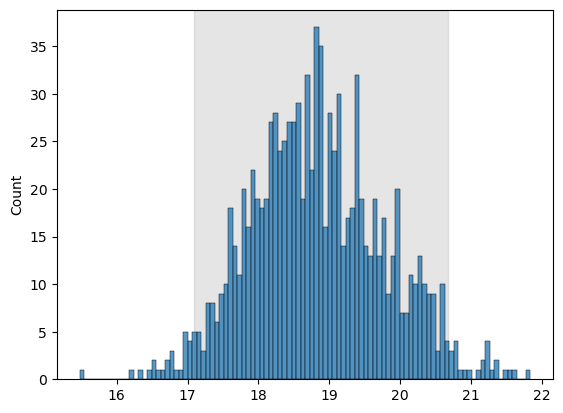

In [32]:
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) 
            for _ in range(n_boots) ]

cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
#sns.distplot(boot_means, bins = 100, kde = False) # distplot is deprecated
sns.histplot(boot_means, bins = 100, kde = False)

plt.show()

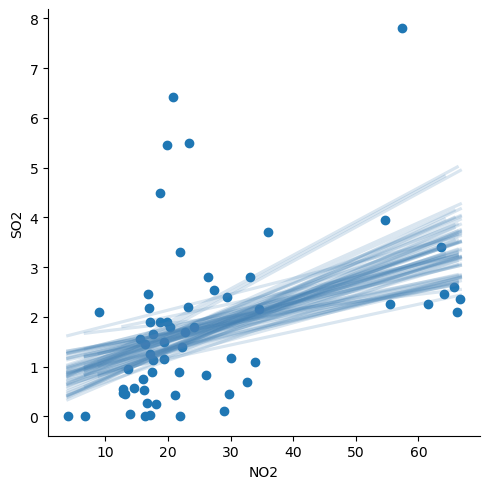

In [34]:
no2_so2 = pd.read_csv('./data/no2_so2.csv',
                          index_col=0)

no2_so2_boot = pd.read_csv('./data/no2_so2_boot.csv',
                          index_col=0)

sns.lmplot(x='NO2', y='SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2)

plt.show()

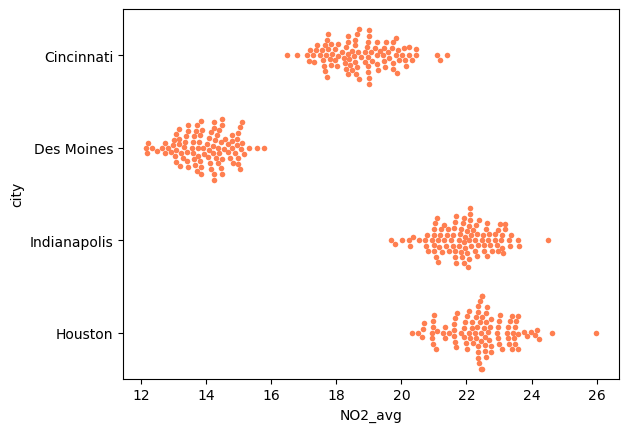

In [37]:
pollution_may = pollution[pollution['month'] == 5]

# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", 
              data = city_boots,
              # seaborn throws a warning, decreasing size to show all of the points
              size = 4,
              color = 'coral')

plt.show()